<a href="https://colab.research.google.com/github/shivani983/computer-vision-handson/blob/main/image_classification_CNN_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
from torch import nn

torch.__version__

'2.6.0+cu124'

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [4]:
%ls

sample_data/


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import os
os.chdir("/content/drive/MyDrive/computervision")

In [7]:
%ls

image_classification_CNN_pytorch.ipynb  sports.zip


In [8]:
!unzip /content/drive/MyDrive/computervision/sports.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/rings/022.jpg     
  inflating: train/rings/023.jpg     
  inflating: train/rings/024.jpg     
  inflating: train/rings/025.jpg     
  inflating: train/rings/026.jpg     
  inflating: train/rings/027.jpg     
  inflating: train/rings/028.jpg     
  inflating: train/rings/029.jpg     
  inflating: train/rings/030.jpg     
  inflating: train/rings/031.jpg     
  inflating: train/rings/032.jpg     
  inflating: train/rings/033.jpg     
  inflating: train/rings/034.jpg     
  inflating: train/rings/035.jpg     
  inflating: train/rings/036.jpg     
  inflating: train/rings/037.jpg     
  inflating: train/rings/038.jpg     
  inflating: train/rings/039.jpg     
  inflating: train/rings/040.jpg     
  inflating: train/rings/041.jpg     
  inflating: train/rings/042.jpg     
  inflating: train/rings/043.jpg     
  inflating: train/rings/044.jpg     
  inflating: train/rings/045.jpg     
  inflating: train/rings/046.jpg     

In [9]:
# loading the dataset
import os
train_dir  = "/content/drive/MyDrive/computervision/train"
test_dir =  "/content/drive/MyDrive/computervision/test"


In [10]:
# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
import random
from PIL import Image
import glob
from pathlib import Path
image_path = "/content/drive/MyDrive/computervision/train/baseball/004.jpg"
image_class = Path(image_path).parent.stem

In [11]:
img = Image.open(image_path)

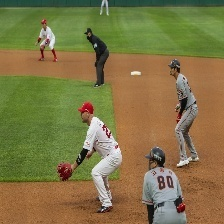

In [12]:
img

In [13]:
# transforming images --->preprocessing
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

image_width = 224
image_height = 224

image_size = (image_width,image_height)

# transform for image

data_transform = transforms.Compose([
    transforms.Resize(size = image_size),
    # flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5), # p is probability of flip, 0.5 -->50% chance
    transforms.ToTensor() # this also converts all pixel values from 0 to 255 to be between 0.0 to 1.0
])


In [14]:
# loading the dataset
from torchvision import datasets

# creating training set
train_data = datasets.ImageFolder(root = train_dir,transform=data_transform,
                                  target_transform=None)
test_data = datasets.ImageFolder(root = test_dir,transform=data_transform)

print(f"train data :\n {train_data} \n{test_data}")

train data :
 Dataset ImageFolder
    Number of datapoints: 13492
    Root location: /content/drive/MyDrive/computervision/train
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           ) 
Dataset ImageFolder
    Number of datapoints: 500
    Root location: /content/drive/MyDrive/computervision/test
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [15]:
img,label = train_data[0][0],train_data[0][1]
print(f"image tensor:{img}")
print((f"image label: {label}"))

image tensor:tensor([[[0.1176, 0.1137, 0.1176,  ..., 0.1922, 0.2314, 0.4510],
         [0.1176, 0.1255, 0.1137,  ..., 0.2157, 0.2314, 0.4941],
         [0.1137, 0.1216, 0.1137,  ..., 0.2392, 0.3843, 0.5020],
         ...,
         [0.2627, 0.2706, 0.2510,  ..., 0.1922, 0.1843, 0.1765],
         [0.2627, 0.2706, 0.2627,  ..., 0.1961, 0.1765, 0.1608],
         [0.2627, 0.2706, 0.2706,  ..., 0.2157, 0.1922, 0.1725]],

        [[0.1176, 0.1098, 0.1176,  ..., 0.0627, 0.0784, 0.2863],
         [0.1176, 0.1216, 0.1137,  ..., 0.0824, 0.0706, 0.3176],
         [0.1176, 0.1176, 0.1137,  ..., 0.0980, 0.2078, 0.3176],
         ...,
         [0.2863, 0.2941, 0.2667,  ..., 0.2078, 0.2000, 0.1922],
         [0.2863, 0.2941, 0.2784,  ..., 0.2118, 0.1922, 0.1765],
         [0.2863, 0.2941, 0.2902,  ..., 0.2353, 0.2078, 0.1882]],

        [[0.1098, 0.0941, 0.0706,  ..., 0.0275, 0.0118, 0.2000],
         [0.1098, 0.1020, 0.0745,  ..., 0.0471, 0.0000, 0.2275],
         [0.0980, 0.0980, 0.0745,  ..., 0.051

In [16]:
# Get class names as a list
class_names = train_data.classes
print("Class names: ",class_names)

# Can also get class names as a dict
class_dict = train_data.class_to_idx
print("Class names as a dict: ",class_dict)

# Check the lengths
print("The lengths of the training and test sets: ", len(train_data), len(test_data))

Class names:  ['air hockey', 'ampute football', 'archery', 'arm wrestling', 'axe throwing', 'balance beam', 'barell racing', 'baseball', 'basketball', 'baton twirling', 'bike polo', 'billiards', 'bmx', 'bobsled', 'bowling', 'boxing', 'bull riding', 'bungee jumping', 'canoe slamon', 'cheerleading', 'chuckwagon racing', 'cricket', 'croquet', 'curling', 'disc golf', 'fencing', 'field hockey', 'figure skating men', 'figure skating pairs', 'figure skating women', 'fly fishing', 'football', 'formula 1 racing', 'frisbee', 'gaga', 'giant slalom', 'golf', 'hammer throw', 'hang gliding', 'harness racing', 'high jump', 'hockey', 'horse jumping', 'horse racing', 'horseshoe pitching', 'hurdles', 'hydroplane racing', 'ice climbing', 'ice yachting', 'jai alai', 'javelin', 'jousting', 'judo', 'lacrosse', 'log rolling', 'luge', 'motorcycle racing', 'mushing', 'nascar racing', 'olympic wrestling', 'parallel bar', 'pole climbing', 'pole dancing', 'pole vault', 'polo', 'pommel horse', 'rings', 'rock climb

Original shape: torch.Size([3, 224, 224]) -> [color_channels, height, width]
Image permute shape: torch.Size([224, 224, 3]) -> [height, width, color_channels]


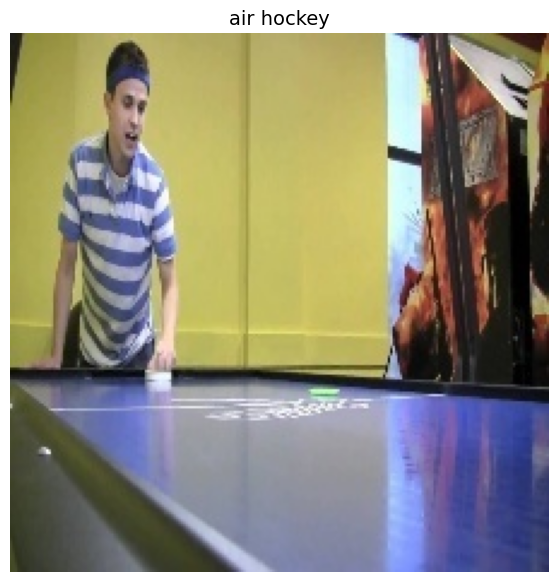

In [17]:
# visualizing this image
import matplotlib.pyplot as plt
# Rearrange the order of dimensions
img_permute = img.permute(1, 2, 0)

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")
plt.title(class_names[label], fontsize=14);

In [18]:
# turn train and test datasets into DataLoaders
from torch.utils.data import DataLoader

train_dataloader = DataLoader(dataset = train_data,
                              batch_size = 32,
                              shuffle = True) # shuffle the data

test_dataloader = DataLoader(dataset = test_data,
                             batch_size = 32,
                             shuffle = False) # no need to shuffle testing data

train_dataloader,test_dataloader


(<torch.utils.data.dataloader.DataLoader at 0x7f4faf499450>,
 <torch.utils.data.dataloader.DataLoader at 0x7f4faf48aa90>)

In [19]:
img, label = next(iter(train_dataloader))

# Note that batch size will now be 1.
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([32, 3, 224, 224]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([32])


In [20]:
# model building
import torchvision.models as models

# Load the pretrained model
model = models.resnet18(pretrained=True)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 192MB/s]


In [21]:
# freeze base layers
for param in model.parameters():
    param.requires_grad = False


In [22]:
import torch.nn as nn

# Modify the final layer
model.fc = nn.Linear(model.fc.in_features, 100)


In [23]:
# move model to device
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [24]:
# loss function
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),lr =1e-3)

In [25]:
# training loop

def train(dataloader, model,loss_fn,optimizer):
  size = len(dataloader.dataset)

  model.train()
  for batch, (X,y) in enumerate(dataloader):
    X,y = X.to(device), y.to(device)

    # compute prediction error
    pred = model(X)
    loss = loss_fn(pred,y)

    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch % 100 ==0:
      loss, current = loss.item(), batch*len(X)
      print(f"loss: {loss:>7f} [{current:>5d}/{size:>5d}]")


In [26]:
def test(dataloader,model,loss_fn):
  size = len(dataloader.dataset)
  num_batches = len(dataloader)
  model.eval()
  test_loss,correct = 0,0
  with torch.no_grad():
    for X,y in dataloader:
      X,y = X.to(device), y.to(device)
      pred = model(X)
      test_loss += loss_fn(pred,y).item()

      correct += (pred.argmax(1) == y).type(torch.float).sum().item()

  test_loss /= num_batches
  correct /=size

  print(f"test error : \n Accuracy : {(100*correct):>0.1f}%,Avg loss: {test_loss:8f} \n")

In [27]:

# start training

epochs = 20

for t in range(epochs):
  print(f"Epoch {t+1}\n--------------------->")
  train(train_dataloader,model,loss_fn,optimizer)
  test(test_dataloader,model,loss_fn)

print("Done!")

Epoch 1
--------------------->
loss: 4.752337 [    0/13492]
loss: 4.760584 [ 3200/13492]
loss: 4.610893 [ 6400/13492]
loss: 4.411711 [ 9600/13492]
loss: 4.453438 [12800/13492]
test error : 
 Accuracy : 5.8%,Avg loss: 4.414348 

Epoch 2
--------------------->
loss: 4.452119 [    0/13492]
loss: 4.388913 [ 3200/13492]
loss: 4.192908 [ 6400/13492]
loss: 4.198910 [ 9600/13492]
loss: 4.083745 [12800/13492]
test error : 
 Accuracy : 14.0%,Avg loss: 4.138001 

Epoch 3
--------------------->
loss: 4.175967 [    0/13492]
loss: 4.012578 [ 3200/13492]
loss: 4.054554 [ 6400/13492]
loss: 4.237944 [ 9600/13492]
loss: 3.998291 [12800/13492]
test error : 
 Accuracy : 21.2%,Avg loss: 3.900738 

Epoch 4
--------------------->
loss: 3.846494 [    0/13492]
loss: 3.762247 [ 3200/13492]
loss: 3.752774 [ 6400/13492]
loss: 3.898413 [ 9600/13492]
loss: 3.659108 [12800/13492]
test error : 
 Accuracy : 28.6%,Avg loss: 3.675615 

Epoch 5
--------------------->
loss: 3.802323 [    0/13492]
loss: 3.658515 [ 3200/134

In [28]:
%ls

'EfficientNetB0-100-(224 X 224)- 98.40.h5'   sports.csv   test/    valid/
 image_classification_CNN_pytorch.ipynb      sports.zip   train/


In [29]:

# save the model

torch.save(model.state_dict(),"CNN_image_model.pth")
print("model saved!")

model saved!


In [30]:
# load the model
model.load_state_dict(torch.load("CNN_image_model.pth"))

<All keys matched successfully>

In [31]:

# Prediction classes:

classes = ['air hockey', 'ampute football', 'archery', 'arm wrestling', 'axe throwing', 'balance beam',
           'barell racing', 'baseball', 'basketball', 'baton twirling', 'bike polo', 'billiards', 'bmx',
           'bobsled', 'bowling', 'boxing', 'bull riding', 'bungee jumping', 'canoe slamon', 'cheerleading',
           'chuckwagon racing', 'cricket', 'croquet', 'curling', 'disc golf', 'fencing', 'field hockey',
           'figure skating men', 'figure skating pairs', 'figure skating women', 'fly fishing', 'football',
           'formula 1 racing', 'frisbee', 'gaga', 'giant slalom', 'golf', 'hammer throw', 'hang gliding',
           'harness racing', 'high jump', 'hockey', 'horse jumping', 'horse racing', 'horseshoe pitching',
           'hurdles', 'hydroplane racing', 'ice climbing', 'ice yachting', 'jai alai', 'javelin', 'jousting',
           'judo', 'lacrosse', 'log rolling', 'luge', 'motorcycle racing', 'mushing', 'nascar racing',
           'olympic wrestling', 'parallel bar', 'pole climbing', 'pole dancing', 'pole vault', 'polo',
           'pommel horse', 'rings', 'rock climbing', 'roller derby', 'rollerblade racing', 'rowing',
           'rugby', 'sailboat racing', 'shot put', 'shuffleboard', 'sidecar racing', 'ski jumping',
           'sky surfing', 'skydiving', 'snow boarding', 'snowmobile racing', 'speed skating',
           'steer wrestling', 'sumo wrestling', 'surfing', 'swimming', 'table tennis', 'tennis',
           'track bicycle', 'trapeze', 'tug of war', 'ultimate', 'uneven bars', 'volleyball',
           'water cycling', 'water polo', 'weightlifting', 'wheelchair basketball', 'wheelchair racing',
           'wingsuit flying']


In [32]:
# for idx, class_name in enumerate(classes):
#     print(f"{idx}: {class_name}")


In [33]:
x, y = test_data[0][0],test_data[0][1]

In [34]:
print(x.shape)

torch.Size([3, 224, 224])


In [35]:
x = x.to('cuda')

with torch.no_grad():
  x = x.unsqueeze(0)
  # x = x.squeeze(0)               # [1, 3, 224, 224]
  print(x.shape)
  pred = model(x)
  predicted,actual = classes[pred[0].argmax(0)],classes[y]
  print(f"predicted: '{predicted}'. Actual: '{actual}'")

torch.Size([1, 3, 224, 224])
predicted: 'air hockey'. Actual: 'air hockey'


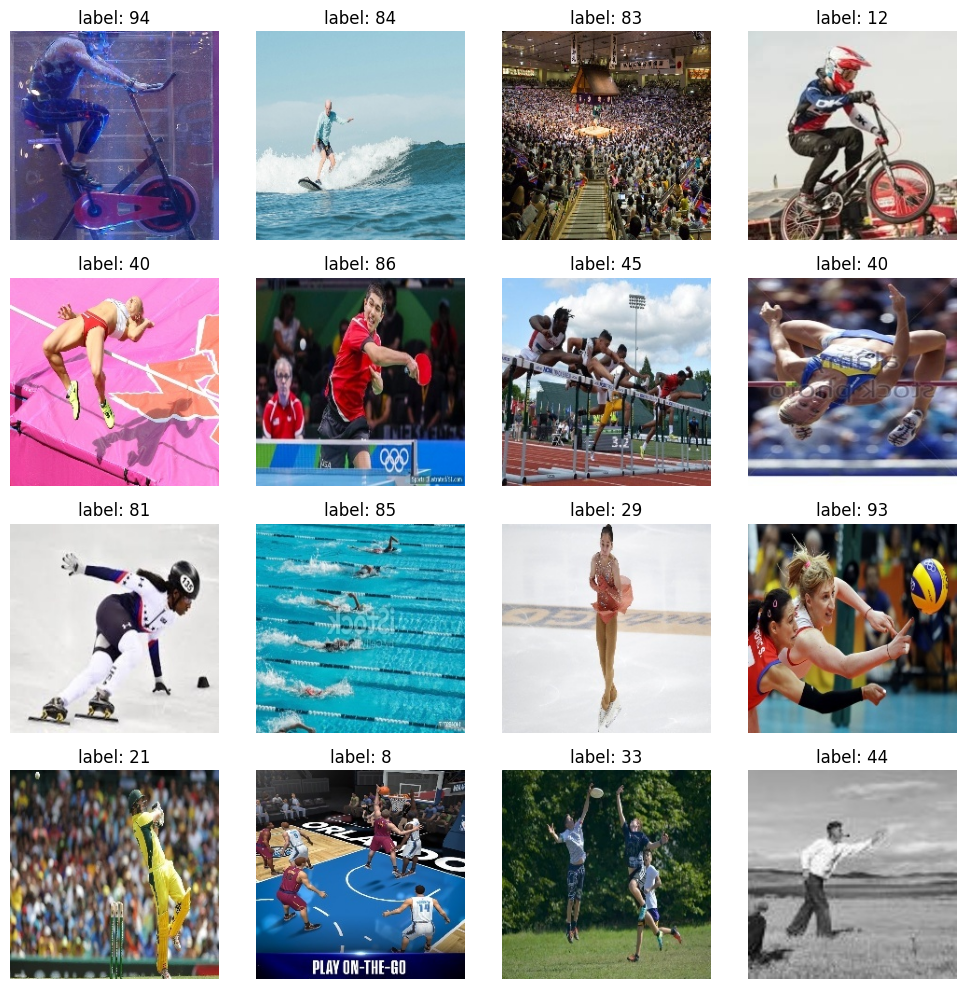

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision
#loop through the training dataloader to get a batch

for images, labels in train_dataloader:
  break  # get the first batch and exit loop

# convert the images into numpy arrays
images = images.numpy()

#plot the images

fig,axes = plt.subplots(nrows = 4,ncols = 4,figsize= (10,10))
for i, ax in enumerate(axes.flat):
    # display the image
    ax.imshow(np.transpose(images[i],(1,2,0)))
    ax.set_title(f"label: {labels[i].item()}")
    ax.axis('off')

plt.tight_layout()

plt.show()

In [37]:
x, y = test_data[10][0],test_data[10][1]

In [38]:
print(x.shape)

torch.Size([3, 224, 224])


In [39]:
x = x.to('cuda')

with torch.no_grad():
  x = x.unsqueeze(0)
  # x = x.squeeze(0)               # [1, 3, 224, 224]
  print(x.shape)
  pred = model(x)
  predicted,actual = classes[pred[0].argmax(0)],classes[y]
  print(f"predicted: '{predicted}'. Actual: '{actual}'")

torch.Size([1, 3, 224, 224])
predicted: 'archery'. Actual: 'archery'


In [43]:
x, y = test_data[51][0],test_data[51][1]

In [44]:
x = x.to('cuda')

with torch.no_grad():
  x = x.unsqueeze(0)
  # x = x.squeeze(0)               # [1, 3, 224, 224]
  print(x.shape)
  pred = model(x)
  predicted,actual = classes[pred[0].argmax(0)],classes[y]
  print(f"predicted: '{predicted}'. Actual: '{actual}'")

torch.Size([1, 3, 224, 224])
predicted: 'bike polo'. Actual: 'bike polo'
